In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Sergii\Desktop\cancer_before_and_after_Chernobyl_Belarus.csv')

In [3]:
palette = {'blue': '#3B7CB3', 'violet': '#9E609C', 'yellow': '#F5EEDC', 'green': '#0C868D', 'red': '#dd4a48'}

In [4]:
mpl.rcParams['figure.figsize'] = (12, 11)
mpl.rcParams['figure.facecolor'] = palette['yellow']
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Calibri'
mpl.rcParams['axes.facecolor'] = palette['yellow']
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.color'] = palette['green']
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True

In [5]:
def green_axes():
    ax.spines['left'].set_color(palette['green'])
    ax.spines['bottom'].set_color(palette['green'])

In [6]:
def arrow(x, y, xlen, ylen, color):
    plt.arrow(x, y, xlen, ylen, color=color, length_includes_head=True, head_length=10, head_width=0.01)

In [7]:
def text_box(x, y, str, ha='left'):
    plt.text(x, y, str, ha=ha, va='center', color=palette['green'], fontsize=10,
             bbox=dict(boxstyle='square', facecolor='#faf6ed', edgecolor='#faf6ed'))

In [8]:
print(df.columns.values)

['year' 'sex' 'location' 'cancer_type' 'cases']


In [9]:
print(df.head())

   year    sex location cancer_type  cases
0  1985  women    Gomel        skin   17.3
1  1985  women  Mogilev        skin   16.8
2  1986  women    Gomel        skin   15.6
3  1986  women  Mogilev        skin   18.3
4  1985  women  Belarus        skin   14.9


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB
None


In [11]:
df.describe()

,year,cases
count,84.000000,84.000000
mean,1985.500000,10.688095
std,0.503003,13.924031
min,1985.000000,0.500000
25%,1985.000000,3.500000
50%,1985.500000,6.350000
75%,1986.000000,10.275000
max,1986.000000,73.100000


In [12]:
df.describe(include=['O'])

,sex,location,cancer_type
count,84,84,84
unique,2,3,7
top,women,Gomel,skin
freq,42,28,12


In [13]:
sum_1985 = np.sum(df[df['year'] == 1985]['cases'])
sum_1986 = np.sum(df[df['year'] == 1986]['cases'])
sums = [sum_1985, sum_1986]

In [14]:
%matplotlib inline

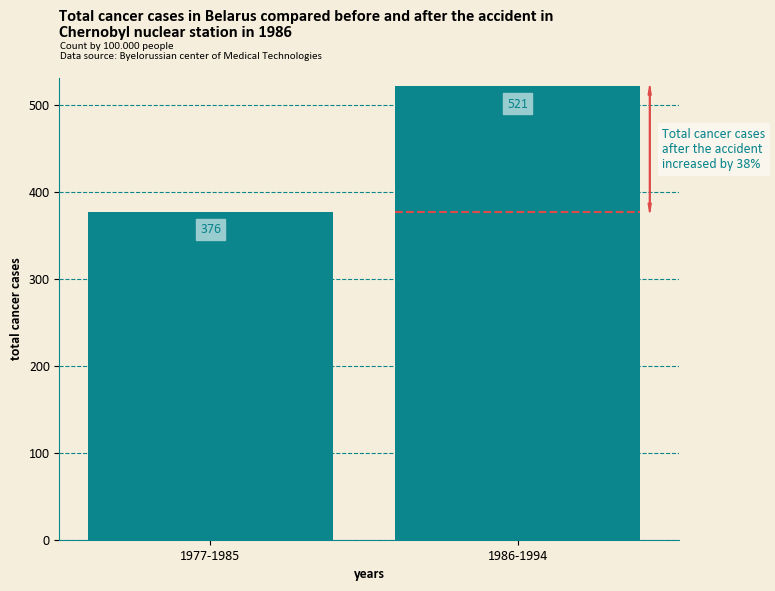

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

green_axes()

#data preporation
years = ['1977-1985', '1986-1994']

#bars
ax.bar(years, sums, color=palette['green'])

#labels
for i, bar_value in enumerate(sums):
    ax.text(i, bar_value - 20, int(bar_value), ha='center', va='center', color=palette['green'], fontsize=10,
            bbox=dict(boxstyle='square', facecolor='#98CCCF', edgecolor='#98CCCF'))

#additioanl elements
red_line = plt.plot((0.6, 1.4), (sum_1985, sum_1985), color=palette['red'], linestyle='--')
arrow(1.43, sum_1985, 0, sum_1986-sum_1985, palette['red'])
arrow(1.43, sum_1986, 0, -(sum_1986-sum_1985), palette['red'])

#annotations
plt.title('Total cancer cases in Belarus compared before and after the accident in\nChernobyl nuclear station in 1986\n\n',
          loc='left', fontweight='bold')

annotate = ax.annotate('Count by 100.000 people\n'
                       'Data source: Byelorussian center of Medical Technologies\n\n', xy=(-0.49, np.max(sums)+5),
                       fontsize=8, ha='left', va='bottom')

text_box(1.47, sum_1985+(sum_1986-sum_1985)/2,
         f'Total cancer cases\nafter the accident\nincreased by {int(sum_1986/sum_1985*100-100)}%')

#xy labels
ax.set_xlabel('years', weight='bold')
ax.set_ylabel('total cancer cases', weight='bold')
ax.set_ylim(0, np.max([np.max(sums)]) + 10)

plt.show()

(0.0, 424.80000000000007)

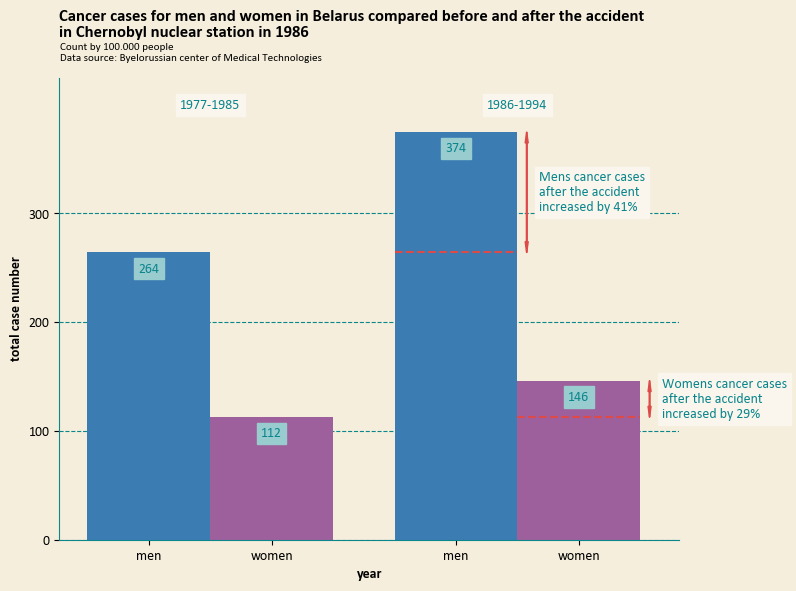

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

#data preporation
sum_1985_men = np.sum(df[(df['year'] == 1985) & (df['sex'] == 'men')]['cases'])
sum_1986_men = np.sum(df[(df['year'] == 1986) & (df['sex'] == 'men')]['cases'])
sum_1985_women = np.sum(df[(df['year'] == 1985) & (df['sex'] == 'women')]['cases'])
sum_1986_women = np.sum(df[(df['year'] == 1986) & (df['sex'] == 'women')]['cases'])

sum_men = [sum_1985_men, sum_1986_men]
sum_women = [sum_1985_women, sum_1986_women]
sums = [sum_1986_women, sum_1985_women, sum_1986_men, sum_1985_men]

x = np.arange(len(sum_men))
width = 0.4

#bars
bar = plt.bar(x-width/2, sum_men, width=width, color=palette['blue'])
bar = plt.bar(x+width/2, sum_women, width=width, color=palette['violet'])

#labels
for i, bar_value in enumerate(sum_men):
    ax.text(i-width/2, bar_value - 15, int(bar_value), ha='center', va='center', color=palette['green'], fontsize=10,
            bbox=dict(boxstyle='square', facecolor='#98CCCF', edgecolor='#98CCCF'))

for i, bar_value in enumerate(sum_women):
    ax.text(i+width/2, bar_value - 15, int(bar_value), ha='center', va='center', color=palette['green'], fontsize=10,
            bbox=dict(boxstyle='square', facecolor='#98CCCF', edgecolor='#98CCCF'))

#annotations
plt.title('Cancer cases for men and women in Belarus compared before and after the accident\nin Chernobyl '
          'nuclear station in 1986\n\n', loc='left', fontweight='bold')

annotate = ax.annotate('Count by 100.000 people\n'
                       'Data source: Byelorussian center of Medical Technologies\n\n', xy=(-0.49, np.max(sums)+45),
                       fontsize=8, ha='left', va='bottom')

for i, x in enumerate(sum_men):
    plt.text(i, np.max(sums) + 25, years[i],
             ha='center', va='center', color=palette['green'], fontsize=10,
             bbox=dict(boxstyle='square', facecolor='#faf6ed', edgecolor='#faf6ed'))

#additional elements
red_line_women = plt.plot((1, 1.4), (sum_1985_women, sum_1985_women), color=palette['red'], linestyle='--')
red_line_men = plt.plot((0.6, 1), (sum_1985_men, sum_1985_men), color=palette['red'], linestyle='--')

arrow(1.03, sum_1985_men, 0, sum_1986_men-sum_1985_men, palette['red'])
arrow(1.03, sum_1986_men, 0, -(sum_1986_men-sum_1985_men), palette['red'])

arrow(1.43, sum_1985_women, 0, sum_1986_women-sum_1985_women, palette['red'])
arrow(1.43, sum_1986_women, 0, -(sum_1986_women-sum_1985_women), palette['red'])


text_box(1.07, sum_1985_men+(sum_1986_men-sum_1985_men)/2,
         f'Mens cancer cases\nafter the accident\nincreased by {int(sum_1986_men/sum_1985_men*100-100)}%')

text_box(1.47, sum_1985_women+(sum_1986_women-sum_1985_women)/2,
         f'Womens cancer cases\nafter the accident\nincreased by {int(sum_1986_women/sum_1985_women*100-100)}%')

green_axes()

#xy labels and ticks
ax.set_ylabel('total case number', weight='bold')
ax.set_xlabel('year', weight='bold')

xticks = ['men', 'women'] * len(sum_men)
xticks_location = []

for i, x in enumerate(sum_men):
    xticks_location.append(i - width/2)
    xticks_location.append(i + width/2)
    
yticks = [i*100 for i in np.arange(int(np.max(sums)/100 + 1))]
ax.set_xticks(xticks_location, xticks)
ax.set_yticks(yticks)

ax.set_ylim(0, np.max([sums]) + 50)

C:\Users\Sergii\AppData\Local\Temp\ipykernel_6620\3285409469.py:51: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yticks = df_agg['cases'].append(pd.Series([100, 150, 200])).astype('int')


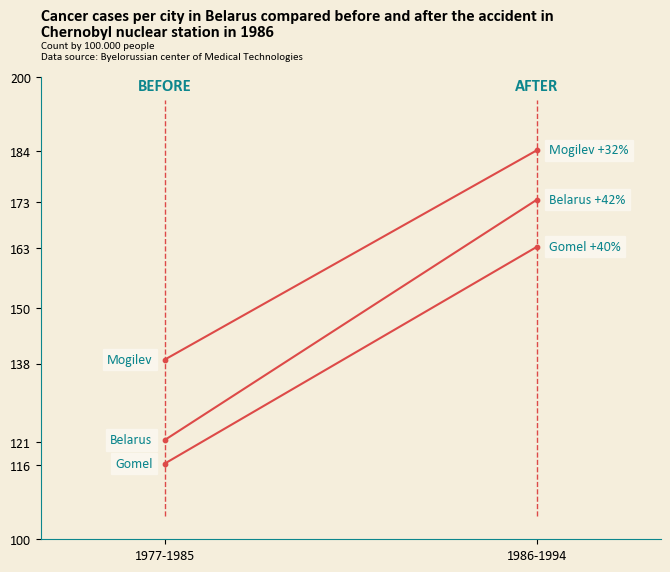

In [17]:
ig = plt.figure(figsize=(8, 6))
ax = plt.axes()

#vertical lines
x_left = 0.2
x_right = 0.8
y_line = 195

ax.vlines(x=x_left, ymin=105, ymax=195, color=palette['red'], linewidth=1, linestyles='--')
ax.vlines(x=x_right, ymin=105, ymax=195, color=palette['red'], linewidth=1, linestyles='--')

#vertical lines labels
ax.text(x_left, 195+3, 'BEFORE', ha='center', va='center', fontsize=12, weight='bold', color=palette['green'])
ax.text(x_right, 195+3, 'AFTER', ha='center', va='center', fontsize=12, weight='bold', color=palette['green'])

#data preparation
df_agg = df.groupby(['location', 'year']).sum('cases').reset_index()

#scatters
ax.scatter(y=df_agg[df_agg['year'] == 1985]['cases'], x=np.repeat(x_left, df_agg.shape[0]/2), s=10, color=palette['red'])
ax.scatter(y=df_agg[df_agg['year'] == 1986]['cases'], x=np.repeat(x_right, df_agg.shape[0]/2), s=10, color=palette['red'])

#points labels
for city in np.unique(df_agg['location']):
    text_box(x_left-0.02, df_agg[(df_agg['year'] == 1985) & (df_agg['location'] == city)]['cases'], city, ha='right')

for city in np.unique(df_agg['location']):
    percentage = ((list(df_agg[(df_agg['year'] == 1986) & (df_agg['location'] == city)]['cases'].values)[0] /
                 list(df_agg[(df_agg['year'] == 1985) & (df_agg['location'] == city)]['cases'].values)[0])*100-100)
    text_box(x_right+0.02, df_agg[(df_agg['year'] == 1986) & (df_agg['location'] == city)]['cases'],
             f"{city} +{percentage.astype(int)}%")

for city in np.unique(df_agg['location']):
    plt.plot([x_left, x_right], df_agg[df_agg['location'] == city]['cases'], color=palette['red'])

#annotations
plt.title('Cancer cases per city in Belarus compared before and after the accident in\nChernobyl '
          'nuclear station in 1986\n\n', loc='left', fontweight='bold')

annotate = ax.annotate('Count by 100.000 people\n'
                       'Data source: Byelorussian center of Medical Technologies\n\n', xy=(0, 199),
                       fontsize=8, ha='left', va='bottom')


green_axes()

ax.grid(False)

ax.set_xlim(0, 1)
ax.set_ylim(100, 200)
yticks = df_agg['cases'].append(pd.Series([100, 150, 200])).astype('int')
ax.set_yticks(yticks)
ax.set_xticks([x_left, x_right], years)

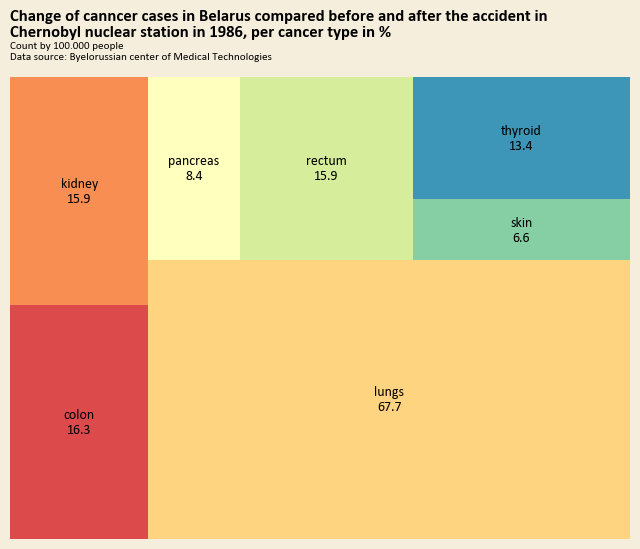

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

#data preparation
df_agg = df.groupby(['cancer_type', 'year']).sum('cases').reset_index()

df_discrepancies = pd.DataFrame({
    'cancer_type': [],
    'discrepancy': []
})

for cancer_type in np.unique(df_agg['cancer_type']):
    discrepancy = df_agg[(df_agg['year'] == 1986) & (df_agg['cancer_type'] == cancer_type)].values[0][2]-\
                  df_agg[(df_agg['year'] == 1985) & (df_agg['cancer_type'] == cancer_type)].values[0][2]
    df_discrepancies.loc[len(df_discrepancies)] = [cancer_type, discrepancy]

    
#labels   
def labels_list(a, b):
    return str(a) + '\n' + str(round(b, 1))


labels = df_discrepancies.apply(lambda x: labels_list(x.cancer_type, x.discrepancy), axis=1)

#plot
squarify.plot(sizes=df_discrepancies['discrepancy'], label=labels,
              color=sns.color_palette('Spectral', n_colors=df_discrepancies.shape[0]))

#annotations
plt.title(label='Change of canncer cases in Belarus compared before and after the accident in\nChernobyl '
          'nuclear station in 1986, per cancer type in %\n\n', loc='left', fontweight='bold')

annotate = ax.annotate('Count by 100.000 people\n'
                       'Data source: Byelorussian center of Medical Technologies\n\n', xy=(0, 99),
                       fontsize=8, ha='left', va='bottom')

#xy ticks
plt.axis(False)
ax.set_yticks([])
ax.set_xticks([])

plt.show()